# Dataset Features

# Import Libraries and Data

In [71]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [72]:
Customer_file = "B_D_master"
Customer_data = pd.read_csv("B_D_master.csv", sep=',')
Customer_data

,id,Genre,Age,statut,membre,nb_log,Presence _J_S,Presence _Ven,Presence _Sam,J_Tra_Etu,H_Tra_Etu,Type_log,Surf_log,Nb_Ch,Nb_niv,Tax_info,Cportnt_T.f.H,Cportnt_T.f.E,Cout_Tri_E_H,Cout_Tri_E_E,Nb_E-Menag,Debranchmt,Dg_clim,Clim_eteint,Cout_Tri_Gaz_H,Cout_Tri_Gaz_E,Type_chauf,Apr_debranch,Dg_clim.1,Cout_Tri_E_H_2,Type_chauf_2,Chauf_eteint
0,1,Femme,18-25 ans,Etudiant(e),Enfant,Moins de 5 personnes,"16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...","20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h",Jours de la semaine,"8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h",Semi collectif,100m? ˆ 130m?,4,0.0,Non,Porter des vtements Žpais,RŽduire la tempŽrature de climatisation au min...,1130 Da- 4290 Da,Plus de 4820 Da,9,Non,18 ˆ 25 ¡C,"Oui, pendant la nuit",490 Da- 2260 Da,210 Da - 490 Da,Le chauffage ˆ gaz naturel,NaN,NaN,NaN,NaN,"Oui, pendant le jour"
1,2,Homme,18-25 ans,Etudiant(e),Autre,plus de 5 personnes,"20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h","8h ˆ 12h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...",Jours de la semaine,"8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 5h ˆ 8h",Maison individuelle,250m? ˆ 300m?,8,4.0,Non,Augmenter la tempŽrature du chauffage au maxim...,RŽduire la tempŽrature de climatisation au min...,Plus de 4820 Da,Plus de 4820 Da,Plus de 27,Non,18 ˆ 25 ¡C,"Oui, pendant la nuit",Je ne sais pas.,Je ne sais pas.,Le chauffage central (avec chaufferie principale),NaN,NaN,NaN,NaN,"Parfois, quelques heures pendant le jour"
2,3,Femme,18-25 ans,Etudiant(e),Enfant,5 personnes,"16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...",Jours de la semaine,"8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h",Collectif,100m? ˆ 130m?,5,0.0,Oui,Porter des vtements Žpais,RŽduire la tempŽrature de climatisation au min...,Je ne sais pas,Je ne sais pas,Plus de 18,Non,18 ˆ 25 ¡C,"Oui, pendant la nuit",Je ne sais pas.,Je ne sais pas.,Le chauffage ˆ gaz naturel,NaN,NaN,NaN,NaN,"Oui, pendant la nuit"
3,4,Homme,18-25 ans,Etudiant(e),Autre,plus de 5 personnes,"16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h","8h ˆ 12h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...","Jours de la semaine, Samedi","20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h",Maison individuelle,90 m? ˆ 150m?,4,2.0,Oui,Porter des vtements Žpais,Prendre des boissons froides,1130 Da- 4290 Da,1130 Da- 4290 Da,13,Oui,NaN,"Parfois, quelques heures pendant le jour",NaN,NaN,NaN,Ordinateur (PC),18 ˆ 25 ¡C,210 Da - 490 Da,Chauffage mural (avec chaudire murale),"Parfois, quelques heures pendant le jour"
4,5,Homme,18-25 ans,Etudiant(e),Enfant,5 personnes,"20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 22h...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 22h ˆ 00h, 00h...",Jours de la semaine,"8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h",Collectif,60m? ˆ 70m?,3,0.0,Oui,Porter des vtements Žpais,Ouvrir les fentres,Je ne sais pas,Je ne sais pas,10,Non,18 ˆ 25 ¡C,"Parfois, quelques heures pendant le jour",490 Da- 2260 Da,210 Da - 490 Da,Le chauffage ˆ gaz naturel,NaN,NaN,NaN,NaN,"Oui, pendant la nuit"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,Femme,35- 65 ans,RetraitŽ(e),Chef de famille (mre),Moins de 5 personnes,"14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00...","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...","14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00...",Aucun,Aucun,Maison individuelle,150m? ˆ 250m?,5,2.0,Oui,Porter des vtements Žpais,Ouvrir les fentres,Plus de 4820 Da,Plus de 4820 Da,18,Oui,NaN,"Parfois, quelques heures pendant la nuit",NaN,NaN,NaN,Machine a laver,18 ˆ 25 ¡C,490 Da- 2260 Da,Chauffage central (avec chaufferie principale),Non
235,236,Femme,18-25 ans,Etudiant(e),Enfant,5 personnes,"20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h","8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h...","12h ˆ 14h, 14h ˆ 1

# Handling Missing Values

In [73]:
Customer_data.isnull().sum()

id                   0
Genre                0
Age                  0
statut               0
membre               0
nb_log               0
Presence _J_S        0
 Presence _Ven       0
Presence _Sam        0
 J_Tra_Etu           0
H_Tra_Etu            0
Type_log             0
Surf_log             0
Nb_Ch                0
Nb_niv               4
Tax_info             0
Cportnt_T.f.H        0
Cportnt_T.f.E        0
Cout_Tri_E_H         0
Cout_Tri_E_E         0
Nb_E-Menag           1
Debranchmt           0
Dg_clim             61
Clim_eteint          0
Cout_Tri_Gaz_H      61
Cout_Tri_Gaz_E      61
Type_chauf          61
Apr_debranch       178
Dg_clim.1          178
Cout_Tri_E_H_2     178
Type_chauf_2       178
Chauf_eteint         0
dtype: int64

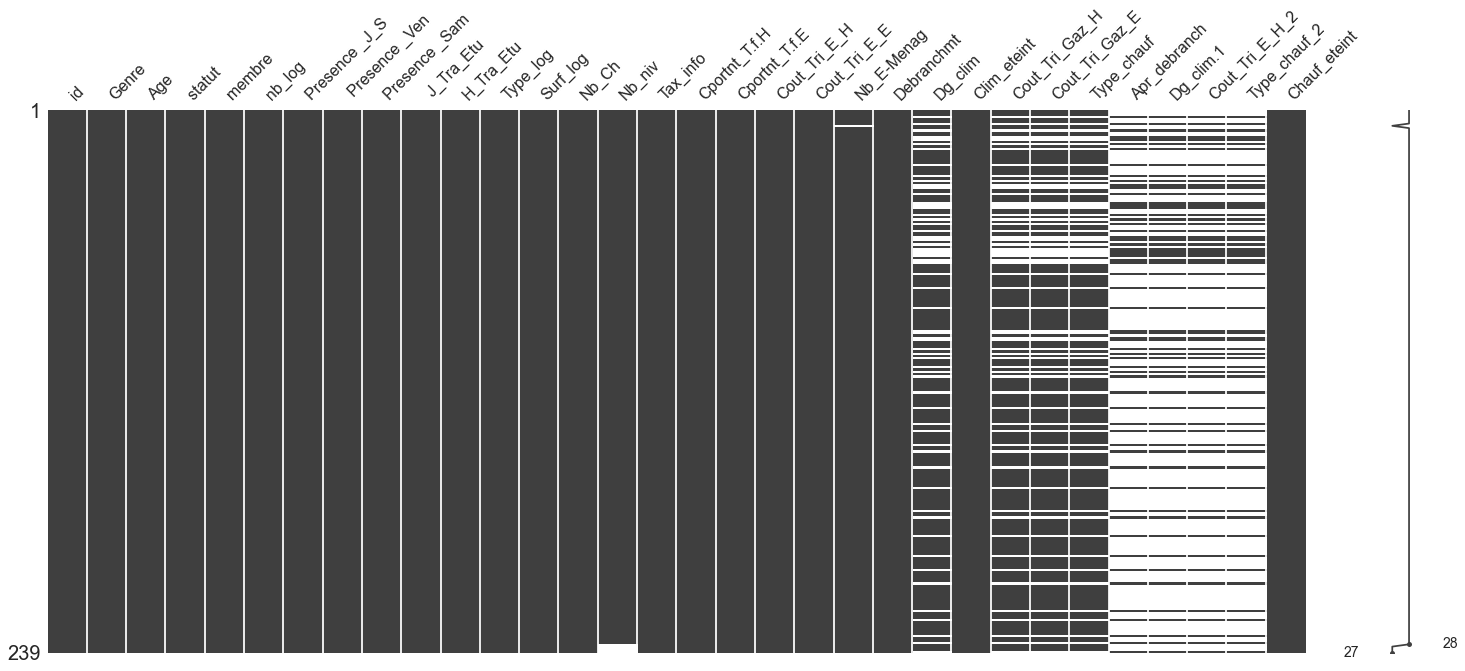

In [74]:
msno.matrix(Customer_data);

In [75]:
Customer_data['Nb_E-Menag'] = Customer_data['Nb_E-Menag'].fillna(0)
Customer_data['Nb_niv'] = Customer_data['Nb_niv'].fillna(0)
Customer_data['Dg_clim'] = Customer_data['Dg_clim'].fillna(0)
Customer_data['Cout_Tri_Gaz_H'] = Customer_data['Cout_Tri_Gaz_H'].fillna(0)
Customer_data['Cout_Tri_Gaz_E'] = Customer_data['Cout_Tri_Gaz_E'].fillna(0)
Customer_data['Type_chauf'] = Customer_data['Type_chauf'].fillna(0)
Customer_data['Apr_debranch'] = Customer_data['Apr_debranch'].fillna(0)
Customer_data['Dg_clim.1'] = Customer_data['Dg_clim.1'].fillna(0)
Customer_data['Cout_Tri_E_H_2'] = Customer_data['Cout_Tri_E_H_2'].fillna(0)
Customer_data['Type_chauf_2'] = Customer_data['Type_chauf_2'].fillna(0)

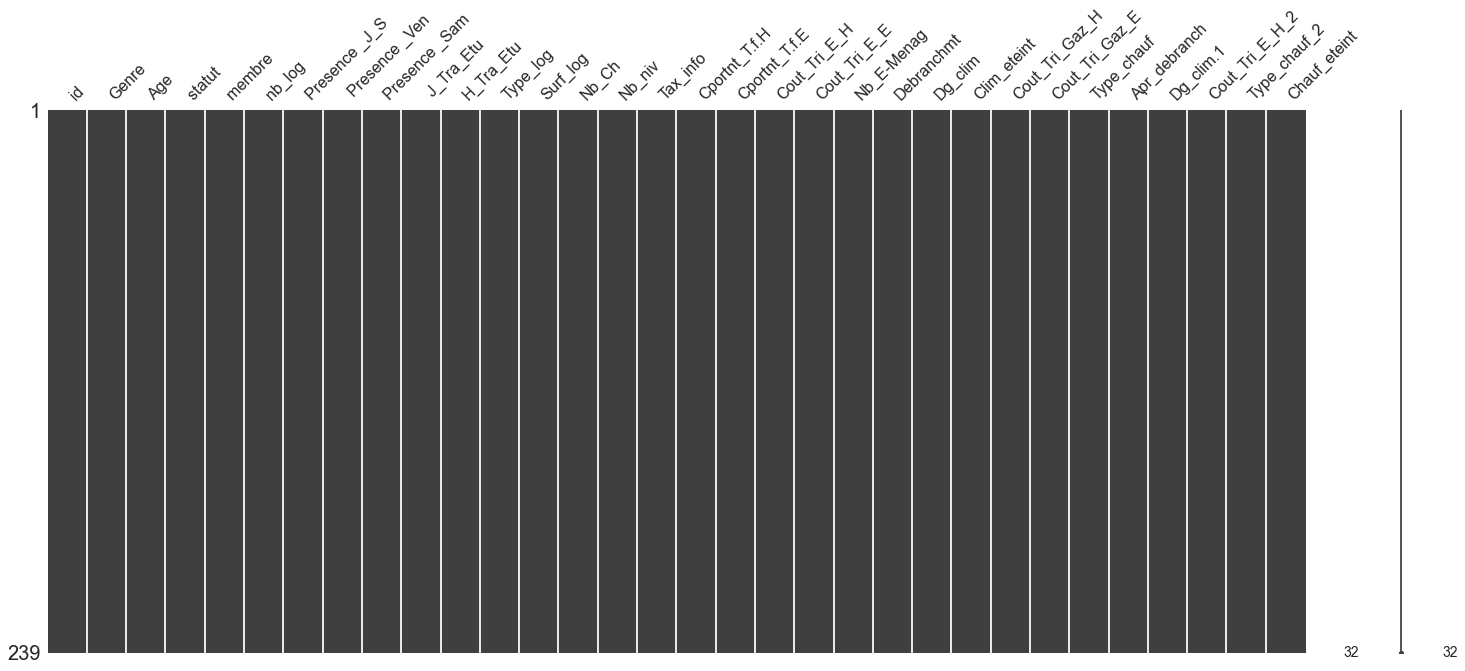

In [76]:
msno.matrix(Customer_data);

In [77]:
Customer_data.isnull().sum()

id                 0
Genre              0
Age                0
statut             0
membre             0
nb_log             0
Presence _J_S      0
 Presence _Ven     0
Presence _Sam      0
 J_Tra_Etu         0
H_Tra_Etu          0
Type_log           0
Surf_log           0
Nb_Ch              0
Nb_niv             0
Tax_info           0
Cportnt_T.f.H      0
Cportnt_T.f.E      0
Cout_Tri_E_H       0
Cout_Tri_E_E       0
Nb_E-Menag         0
Debranchmt         0
Dg_clim            0
Clim_eteint        0
Cout_Tri_Gaz_H     0
Cout_Tri_Gaz_E     0
Type_chauf         0
Apr_debranch       0
Dg_clim.1          0
Cout_Tri_E_H_2     0
Type_chauf_2       0
Chauf_eteint       0
dtype: int64

In [78]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               239 non-null    int64  
 1   Genre            239 non-null    object 
 2   Age              239 non-null    object 
 3   statut           239 non-null    object 
 4   membre           239 non-null    object 
 5   nb_log           239 non-null    object 
 6   Presence _J_S    239 non-null    object 
 7    Presence _Ven   239 non-null    object 
 8   Presence _Sam    239 non-null    object 
 9    J_Tra_Etu       239 non-null    object 
 10  H_Tra_Etu        239 non-null    object 
 11  Type_log         239 non-null    object 
 12  Surf_log         239 non-null    object 
 13  Nb_Ch            239 non-null    object 
 14  Nb_niv           239 non-null    float64
 15  Tax_info         239 non-null    object 
 16  Cportnt_T.f.H    239 non-null    object 
 17  Cportnt_T.f.E   

In [79]:
categorical = [var for var in Customer_data.columns if Customer_data[var].dtype=='O']

In [80]:
categorical

['Genre',
 'Age',
 'statut ',
 'membre ',
 'nb_log',
 'Presence _J_S',
 ' Presence _Ven ',
 'Presence _Sam ',
 ' J_Tra_Etu',
 'H_Tra_Etu',
 'Type_log',
 'Surf_log',
 'Nb_Ch',
 'Tax_info',
 'Cportnt_T.f.H',
 'Cportnt_T.f.E',
 'Cout_Tri_E_H',
 'Cout_Tri_E_E',
 'Nb_E-Menag',
 'Debranchmt',
 'Dg_clim',
 'Clim_eteint',
 'Cout_Tri_Gaz_H',
 'Cout_Tri_Gaz_E',
 'Type_chauf',
 'Apr_debranch',
 'Dg_clim.1',
 'Cout_Tri_E_H_2',
 'Type_chauf_2',
 'Chauf_eteint']

In [81]:
# check the number of different labels
for var in categorical:
    print(Customer_data[var].value_counts() / np.float(len(Customer_data)))
    print()
    print()

Femme    0.606695
Homme    0.393305
Name: Genre, dtype: float64


25-35 ans         0.405858
18-25 ans         0.384937
35- 65 ans        0.167364
14-18 ans         0.025105
Plus de 65 ans    0.016736
Name: Age, dtype: float64


Etudiant(e)             0.376569
SalariŽ(e)              0.154812
Fonctionnaire           0.142259
RetraitŽ(e)             0.133891
Sans emploi             0.129707
En fonction libŽrale    0.037657
Elve                   0.020921
Haute fonction          0.004184
Name: statut , dtype: float64


Enfant                    0.523013
Chef de famille (mre)    0.263598
Chef de famille (pre)    0.184100
Autre                     0.029289
Name: membre , dtype: float64


Moins de 5 personnes    0.523013
5 personnes             0.401674
plus de 5 personnes     0.075314
Name: nb_log, dtype: float64


20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h                                               0.418410
16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h                            

Remarque:
    nous allons passer de valeurs catigorielles aux valeurs numériques

In [82]:
Customer_data['Genre'].unique()

array(['Femme', 'Homme'], dtype=object)

exemple: nous allons remplacé "femme "par 1 et "homme"par 0 

In [83]:
Customer_data['Genre'] = Customer_data['Genre'].map({'Homme':0,'Femme':1})

In [84]:
Customer_data['Genre'].unique()

array([1, 0], dtype=int64)

In [85]:
Customer_data.dtypes

id                   int64
Genre                int64
Age                 object
statut              object
membre              object
nb_log              object
Presence _J_S       object
 Presence _Ven      object
Presence _Sam       object
 J_Tra_Etu          object
H_Tra_Etu           object
Type_log            object
Surf_log            object
Nb_Ch               object
Nb_niv             float64
Tax_info            object
Cportnt_T.f.H       object
Cportnt_T.f.E       object
Cout_Tri_E_H        object
Cout_Tri_E_E        object
Nb_E-Menag          object
Debranchmt          object
Dg_clim             object
Clim_eteint         object
Cout_Tri_Gaz_H      object
Cout_Tri_Gaz_E      object
Type_chauf          object
Apr_debranch        object
Dg_clim.1           object
Cout_Tri_E_H_2      object
Type_chauf_2        object
Chauf_eteint        object
dtype: object

In [86]:
Customer_data['Age'] = Customer_data['Age'].map({'25-35 ans':0,'18-25 ans':1,'35- 65 ans':2,'14-18 ans':3,'Plus de 65 ans':4})

In [87]:
Customer_data['Age'].unique()

array([1, 3, 2, 0, 4], dtype=int64)

In [88]:
Customer_data['statut '] = Customer_data['statut '].map({'Etudiant(e)':0,'SalariŽ(e)':1,'Fonctionnaire':2,'RetraitŽ(e)':3,'Sans emploi':4,'Haute fonction':5,'En fonction libŽrale':6,'Elve':7 })

In [89]:
Customer_data['statut '].unique()

array([0, 6, 1, 7, 3, 4, 2, 5], dtype=int64)

In [90]:
Customer_data['membre '] = Customer_data['membre '].map({'Enfant':0,'Chef de famille (mre)':1,'Chef de famille (pre)':2,'Autre':3})

In [91]:
Customer_data['membre '].unique()

array([0, 3, 2, 1], dtype=int64)

In [92]:
Customer_data['nb_log'] = Customer_data['nb_log'].map({'Moins de 5 personnes':0,'5 personnes':1,'plus de 5 personnes':2 })

In [93]:
Customer_data['nb_log'].unique()

array([0, 2, 1], dtype=int64)

In [94]:
Customer_data['Presence _J_S'] = Customer_data['Presence _J_S'].map({'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':1,'16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':2,'12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':3,'14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':4,'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':5,'8h ˆ 12h':6,'16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':7,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':8,'16h ˆ 20h, 00h ˆ 5h, 5h ˆ 8h':0,'00h ˆ 5h':0,'14h ˆ 16h':0,'20h ˆ 22h':0,'20h ˆ 22h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h':0,'22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':0,'12h ˆ 14h, 16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0, '12h ˆ 14h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0})

In [95]:
 Customer_data['Presence _J_S'].unique()

array([2, 5, 7, 1, 0, 6, 8, 4, 3], dtype=int64)

In [96]:
Customer_data[' Presence _Ven '] = Customer_data[' Presence _Ven '].map({'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':1,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':2,'8h ˆ 12h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h':0,'12h ˆ 14h':0,'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'14h ˆ 16h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'22h ˆ 00h':0,'16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 00h ˆ 5h, 5h ˆ 8h':0,'00h ˆ 5h':0,'14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 16h ˆ 20h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'16h ˆ 20h':0,'12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 14h ˆ 16h, 16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'20h ˆ 22h':0 })

In [97]:
Customer_data[' Presence _Ven '].unique()

array([1, 0, 2], dtype=int64)

In [98]:
Customer_data['Presence _Sam '] = Customer_data['Presence _Sam '].map({'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':1,'12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':2,'14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':3,'12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 00h ˆ 5h, 5h ˆ 8h':4,'12h ˆ 14h, 14h ˆ 16h, 00h ˆ 5h, 5h ˆ 8h':5,'8h ˆ 12h, 12h ˆ 14h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'20h ˆ 22h':0,'16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'14h ˆ 16h':0,'16h ˆ 20h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'20h ˆ 22h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 00h ˆ 5h, 5h ˆ 8h':0,'00h ˆ 5h':0,'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'12h ˆ 14h':0,'22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 00h ˆ 5h, 5h ˆ 8h':0,'00h ˆ 5h, 5h ˆ 8h':0 })

In [99]:
Customer_data['Presence _Sam '].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [100]:
Customer_data[' J_Tra_Etu'] = Customer_data[' J_Tra_Etu'].map({'Vendredi, Samedi':0,'Jours de la semaine, Vendredi':0,'Vendredi, Samedi, Aucun':0,'Jours de la semaine, Vendredi, Samedi':2, 'Jours de la semaine, Samedi':3,'Aucun':4,'Jours de la semaine':5 })

In [101]:
Customer_data[' J_Tra_Etu'].unique()

array([5, 3, 2, 4, 0], dtype=int64)

In [102]:
Customer_data['H_Tra_Etu'] = Customer_data['H_Tra_Etu'].map({'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h':1,'Aucun':2,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h':3,'8h ˆ 12h':4,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 20h ˆ 22h, 22h ˆ 00h':0,'14h ˆ 16h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h':0,'12h ˆ 14h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h':0,'8h ˆ 12h, 14h ˆ 16h':0,'8h ˆ 12h, 12h ˆ 14h, 14h ˆ 16h, 16h ˆ 20h, 20h ˆ 22h, 22h ˆ 00h, 5h ˆ 8h':0,'8h ˆ 12h, 12h ˆ 14h':0,'8h ˆ 12h, 5h ˆ 8h':0,'5h ˆ 8h':0,'20h ˆ 22h, 22h ˆ 00h, 00h ˆ 5h':0 })

In [103]:
Customer_data['H_Tra_Etu'].unique()

array([1, 0, 3, 4, 2], dtype=int64)

In [104]:
Customer_data['Type_log'] = Customer_data['Type_log'].map({'Semi collectif':0,'Maison individuelle':1,'Collectif':2 })

In [105]:
Customer_data['Type_log'].unique()

array([0, 1, 2], dtype=int64)

In [106]:
Customer_data['Surf_log'] = Customer_data['Surf_log'].map({'30m? ˆ 60m?':0,'250m? ˆ 300m?':0,'70m? ˆ 80m?':1,'90 m? ˆ 150m?':2,'Je ne sais pas':3,'100m? ˆ 130m?':4,'80m? ˆ 100m?':5,'150m? ˆ 250m?':6,'60m? ˆ 70m?':7 })

In [107]:
Customer_data['Surf_log'].unique()

array([4, 0, 2, 7, 6, 1, 5, 3], dtype=int64)

In [108]:
Customer_data['Nb_Ch'] = Customer_data['Nb_Ch'].map({'Plus de 6':0,'9':0,'7':0,'11':0,'14':0,'1':0,'8':0,'6':1,'4':2,'5':3,'2':4,'3':5})

In [109]:
Customer_data['Nb_Ch'].unique()

array([2, 0, 3, 5, 1, 4], dtype=int64)

In [110]:
Customer_data['Tax_info'] = Customer_data['Tax_info'].map({'Oui':1,'Non':0 })

In [111]:
Customer_data['Tax_info'].unique()

array([0, 1], dtype=int64)

In [112]:
Customer_data['Cportnt_T.f.H'] = Customer_data['Cportnt_T.f.H'].map({'Autre':0,'Prendre des boissons chaudes':1,'Rajouter des radiateurs Žlectriques':2,'Porter des vtements Žpais':3,'Augmenter la tempŽrature du chauffage au maximal possible':4 })

In [113]:
Customer_data['Cportnt_T.f.H'].unique()

array([3, 4, 2, 0, 1], dtype=int64)

In [114]:
Customer_data['Cportnt_T.f.E'] = Customer_data['Cportnt_T.f.E'].map({'Autre':0,'Prendre des boissons froides':1,'Allumer tous les climatiseurs en mme temps':2,'Ouvrir les fentres':3,'Porter des vtements lŽgers':4,'RŽduire la tempŽrature de climatisation au minimal possible':5 })

In [115]:
Customer_data['Cportnt_T.f.E'].unique()

array([5, 1, 3, 2, 0, 4], dtype=int64)

In [116]:
Customer_data['Cout_Tri_E_H'] = Customer_data['Cout_Tri_E_H'].map({'240 Da- 1130 Da':0,'1130 Da- 4290 Da':1,'Plus de 4820 Da':2,'4290 Da - 4820 Da':3,'Je ne sais pas':4})

In [117]:
Customer_data['Cout_Tri_E_H'].unique()

array([1, 2, 4, 3, 0], dtype=int64)

In [118]:
Customer_data['Cout_Tri_E_E'] = Customer_data['Cout_Tri_E_E'].map({'240 Da- 1130 Da':0,'1130 Da- 4290 Da':1,'4290 Da - 4820 Da':2,'Je ne sais pas':3,'Plus de 4820 Da':4})

In [119]:
Customer_data['Cout_Tri_E_E'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [120]:
Customer_data['Nb_E-Menag'] = Customer_data['Nb_E-Menag'].map({'0':0,'3':0,'26':0,'20':0,'Plus de 17':0,'0':0,'Plus de 27':0,'Plus de 25':0,'22':0,'21':0,'17':0,'Plus de 16':0,'Plus de 18':0,'16':0,'19':0,'5':0,'14':0,'13':0,'6':0,'7':0,'12':1,'8':2,'18':3,'11':4,'9':5,'10':6 })

In [121]:
Customer_data['Nb_E-Menag'].unique()

array([ 5.,  0.,  6.,  3., nan,  4.,  1.,  2.])

In [122]:
Customer_data['Debranchmt'] = Customer_data['Debranchmt'].map({'Oui':1,'Non':0 })

In [123]:
Customer_data['Debranchmt'].unique()

array([0, 1], dtype=int64)

In [124]:
Customer_data['Dg_clim'] = Customer_data['Dg_clim'].map({'18 ˆ 25 ¡C, 25 - 30¡C':0,'16 ˆ 18¡C':1,'25 - 30¡C':2,'0':3,'18 ˆ 25 ¡C':4 })

In [125]:
Customer_data['Dg_clim'].unique()

array([ 4., nan,  1.,  2.,  0.])

In [126]:
Customer_data['Clim_eteint'] = Customer_data['Clim_eteint'].map({'Non':0,'Parfois, quelques heures pendant le jour':1,'Oui, pendant le jour':2,'Parfois, quelques heures pendant la nuit':3,'Oui, pendant la nuit':4 })

In [127]:
Customer_data['Clim_eteint'].unique()

array([4, 1, 0, 2, 3], dtype=int64)

In [128]:
Customer_data['Cout_Tri_Gaz_H'] = Customer_data['Cout_Tri_Gaz_H'].map({'Moins de 210 Da':0,'210 Da - 490 Da':0,'490 Da- 2260 Da':1,'0':2,'Plus de 2260 Da':3,'Je ne sais pas.':4 })

In [129]:
Customer_data['Cout_Tri_Gaz_H'].unique()

array([ 1.,  4., nan,  3.,  0.])

In [130]:
Customer_data['Cout_Tri_Gaz_E'] = Customer_data['Cout_Tri_Gaz_E'].map({'Plus de 2260 Da':0,'210 Da - 490 Da':1,'490 Da- 2260 Da':2,'Je ne sais pas.':4 })

In [131]:
Customer_data['Cout_Tri_Gaz_E'].unique()

array([ 1.,  4., nan,  2.,  0.])

In [132]:
Customer_data['Type_chauf'] = Customer_data['Type_chauf'].map({'Autre':0,'Le radiateur Žlectrique':0,'Le climatiseur pour chauffer':1,'Le chauffage mural (avec chaudire murale)':2,'Le chauffage central (avec chaufferie principale)':3,'0':4,'Le chauffage ˆ gaz naturel':5 })

In [133]:
Customer_data['Type_chauf'].unique()

array([ 5.,  3., nan,  2.,  0.,  1.])

In [134]:
Customer_data['Dg_clim.1'] = Customer_data['Dg_clim.1'].map({'25 ˆ 30¡C':1,'16 ˆ 18 ¡C':2,'18 ˆ 25 ¡C':3 })

In [135]:
Customer_data['Dg_clim.1'].unique()

array([nan,  3.,  1.,  2.])

In [136]:
Customer_data['Cout_Tri_E_H_2'] = Customer_data['Cout_Tri_E_H_2'].map({'Moins de 210 Da':0,'Plus de 2260 Da':0,'210 Da - 490 Da':1,'Je ne sais pas.':2,'490 Da- 2260 Da':3,'0':4 })

In [137]:
Customer_data['Cout_Tri_E_H_2'].unique()

array([nan,  1.,  3.,  2.,  0.])

In [138]:
Customer_data['Type_chauf_2'] = Customer_data['Type_chauf_2'].map({'Radiateur Žlectrique':0,'Autre':0,'Chauffage mural (avec chaudire murale)':1,'Chauffage ˆ gaz naturel':2,'Chauffage central (avec chaufferie principale)':3,'0':4 })

In [139]:
Customer_data['Type_chauf_2'].unique()

array([nan,  1.,  3.,  2.,  0.])

In [140]:
Customer_data['Chauf_eteint'] = Customer_data['Chauf_eteint'].map({'Oui, pendant le jour':0,'Non':1,'Parfois, quelques heures pendant le jour':2,'Parfois, quelques heures pendant la nuit':3,'Oui, pendant la nuit':4 })

In [141]:
Customer_data['Chauf_eteint'].unique()

array([0, 2, 4, 1, 3], dtype=int64)

In [143]:
Customer_data.head(10)

,id,Genre,Age,statut,membre,nb_log,Presence _J_S,Presence _Ven,Presence _Sam,J_Tra_Etu,H_Tra_Etu,Type_log,Surf_log,Nb_Ch,Nb_niv,Tax_info,Cportnt_T.f.H,Cportnt_T.f.E,Cout_Tri_E_H,Cout_Tri_E_E,Nb_E-Menag,Debranchmt,Dg_clim,Clim_eteint,Cout_Tri_Gaz_H,Cout_Tri_Gaz_E,Type_chauf,Apr_debranch,Dg_clim.1,Cout_Tri_E_H_2,Type_chauf_2,Chauf_eteint
0,1,1,1,0,0,0,2,1,0,5,1,0,4,2,0.0,0,3,5,1,4,5.0,0,4.0,4,1.0,1.0,5.0,0,NaN,NaN,NaN,0
1,2,0,1,0,3,2,5,0,1,5,0,1,0,0,4.0,0,4,5,2,4,0.0,0,4.0,4,4.0,4.0,3.0,0,NaN,NaN,NaN,2
2,3,1,1,0,0,1,2,1,1,5,1,2,4,3,0.0,1,3,5,4,3,0.0,0,4.0,4,4.0,4.0,5.0,0,NaN,NaN,NaN,4
3,4,0,1,0,3,2,7,0,1,3,0,1,2,2,2.0,1,3,1,1,1,0.0,1,NaN,1,NaN,NaN,NaN,Ordinateur (PC),3.0,1.0,1.0,2
4,5,0,1,0,0,1,1,0,0,5,1,2,7,5,0.0,1,3,3,4,3,6.0,0,4.0,1,1.0,1.0,5.0,0,NaN,NaN,NaN,4
5,6,1,1,0,0,0,2,1,0,3,1,1,6,1,4.0,0,4,3,4,3,0.0,0,4.0,4,4.0,4.0,2.0,0,NaN,NaN,NaN,1
6,7,1,1,0,0,1,2,1,1,5,1,1,2,1,3.0,1,3,5,3,4,3.0,1,NaN,0,NaN,NaN,NaN,"Climatiseur, TŽlŽviseur",3.0,1.0,3.0,0
7,8,1,1,0,0,2,0,1,0,3,1,1,0,0,4.0,0,4,2,4,3,NaN,0,1.0,1,4.0,4.0,3.0,0,NaN,NaN,NaN,2
8,9,1,1,0,0,1,1,0,0,2,0,1,2,3,1.0,0,4,5,3,4,0.0,0,4.0,2,3.0,2.0,5.0,0,NaN,NaN,NaN,2
9,10,0,1,0,0,0,1,0,0,5,1,1,6,2,2.0,1,4,5,3,2,0.0,1,NaN,4,NaN,NaN,NaN,"Climatiseur, Ventilateur, TŽlŽviseur, Micro on...",3.0,3.0,3.0,2


# Data Analysis and Visualization

In [145]:
Customer_data.shape

(239, 32)

In [146]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               239 non-null    int64  
 1   Genre            239 non-null    int64  
 2   Age              239 non-null    int64  
 3   statut           239 non-null    int64  
 4   membre           239 non-null    int64  
 5   nb_log           239 non-null    int64  
 6   Presence _J_S    239 non-null    int64  
 7    Presence _Ven   239 non-null    int64  
 8   Presence _Sam    239 non-null    int64  
 9    J_Tra_Etu       239 non-null    int64  
 10  H_Tra_Etu        239 non-null    int64  
 11  Type_log         239 non-null    int64  
 12  Surf_log         239 non-null    int64  
 13  Nb_Ch            239 non-null    int64  
 14  Nb_niv           239 non-null    float64
 15  Tax_info         239 non-null    int64  
 16  Cportnt_T.f.H    239 non-null    int64  
 17  Cportnt_T.f.E   

In [147]:
Customer_data.describe()

,id,Genre,Age,statut,membre,nb_log,Presence _J_S,Presence _Ven,Presence _Sam,J_Tra_Etu,H_Tra_Etu,Type_log,Surf_log,Nb_Ch,Nb_niv,Tax_info,Cportnt_T.f.H,Cportnt_T.f.E,Cout_Tri_E_H,Cout_Tri_E_E,Nb_E-Menag,Debranchmt,Dg_clim,Clim_eteint,Cout_Tri_Gaz_H,Cout_Tri_Gaz_E,Type_chauf,Dg_clim.1,Cout_Tri_E_H_2,Type_chauf_2,Chauf_eteint
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,238.000000,239.000000,178.000000,239.000000,178.000000,178.000000,178.000000,61.000000,61.000000,61.000000,239.000000
mean,120.000000,0.606695,0.861925,1.753138,0.719665,0.552301,2.175732,1.100418,1.958159,4.514644,1.627615,1.677824,5.238494,3.711297,0.577406,0.276151,3.468619,4.184100,2.861925,3.305439,3.138655,0.255230,3.769663,3.004184,3.235955,2.685393,4.511236,2.836066,2.311475,2.393443,3.058577
std,69.137544,0.489509,0.899214,1.852134,0.865340,0.632111,1.744884,0.659736,1.702176,0.834394,0.911776,0.543071,2.147312,1.342704,1.089133,0.448031,0.726204,1.137407,1.104695,0.918308,2.156752,0.436905,0.757472,1.010441,0.980286,1.345388,1.189591,0.489228,1.057371,0.842193,1.330287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,60.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,4.000000,3.000000,0.000000,0.000000,3.000000,3.500000,2.000000,3.000000,1.000000,0.000000,4.000000,2.000000,3.000000,1.250000,5.000000,3.000000,2.000000,2.000000,2.000000
50%,120.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,1.000000,2.000000,6.000000,4.000000,0.000000,0.000000,4.000000,5.000000,3.000000,4.000000,3.000000,0.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,3.000000,4.000000
75%,179.500000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,7.000000,5.000000,0.000000,1.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000
max,239.000000,1.000000,4.000000,7.000000,3.000000,2.000000,8.000000,2.000000,5.000000,5.000000,4.000000,2.000000,7.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000,6.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000


In [148]:
Customer_data.describe(include=object).T

,count,unique,top,freq
Apr_debranch,239,34,0,178


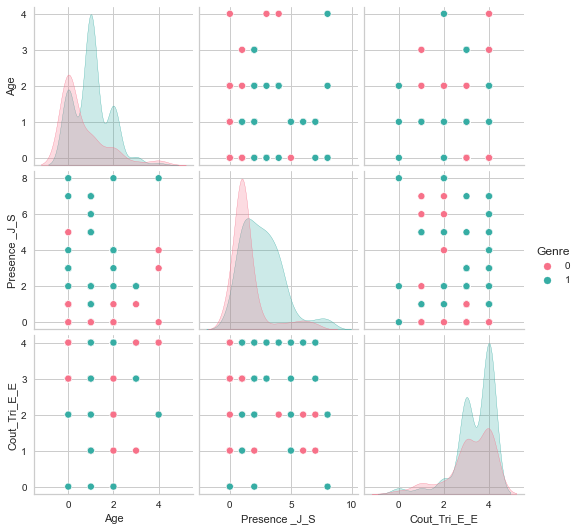

In [150]:
sns.pairplot(Customer_data , vars=['Age','Presence _J_S','Cout_Tri_E_E'] , hue='Genre', palette='husl');

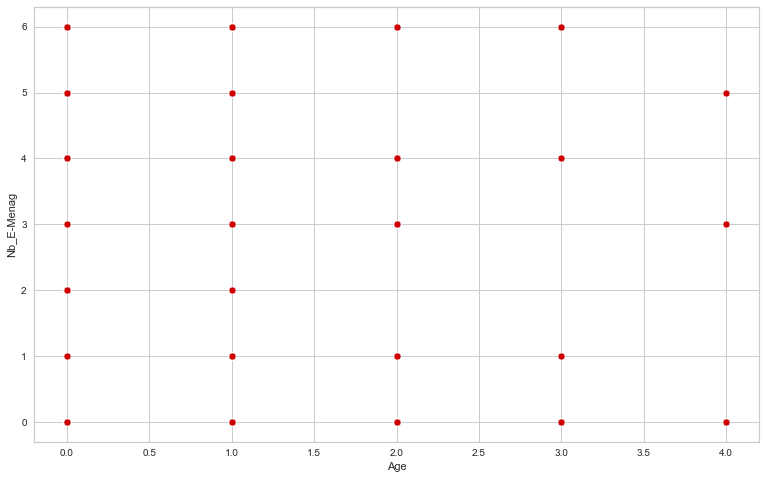

In [156]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=Customer_data[Customer_data['Nb_E-Menag']<10]['Age'], y=Customer_data[Customer_data['Nb_E-Menag']<10]['Nb_E-Menag'], color='#cc0000');

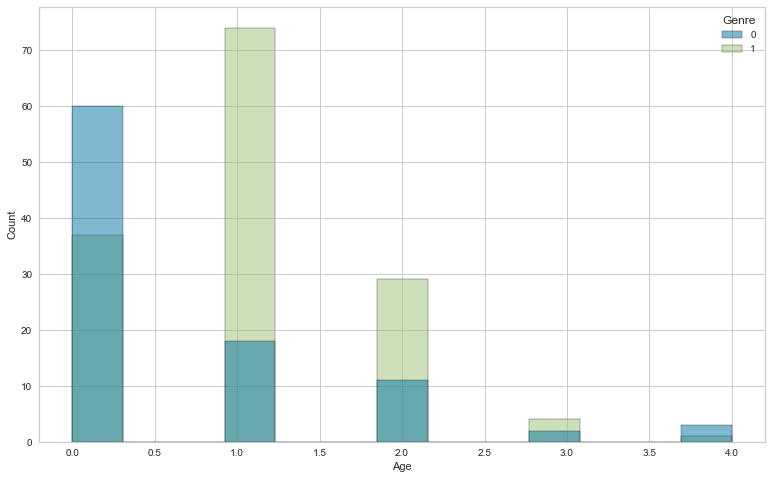

In [158]:
plt.figure(figsize=(13,8))
sns.histplot(x=Customer_data['Age'], hue=Customer_data['Genre']);

<AxesSubplot:>

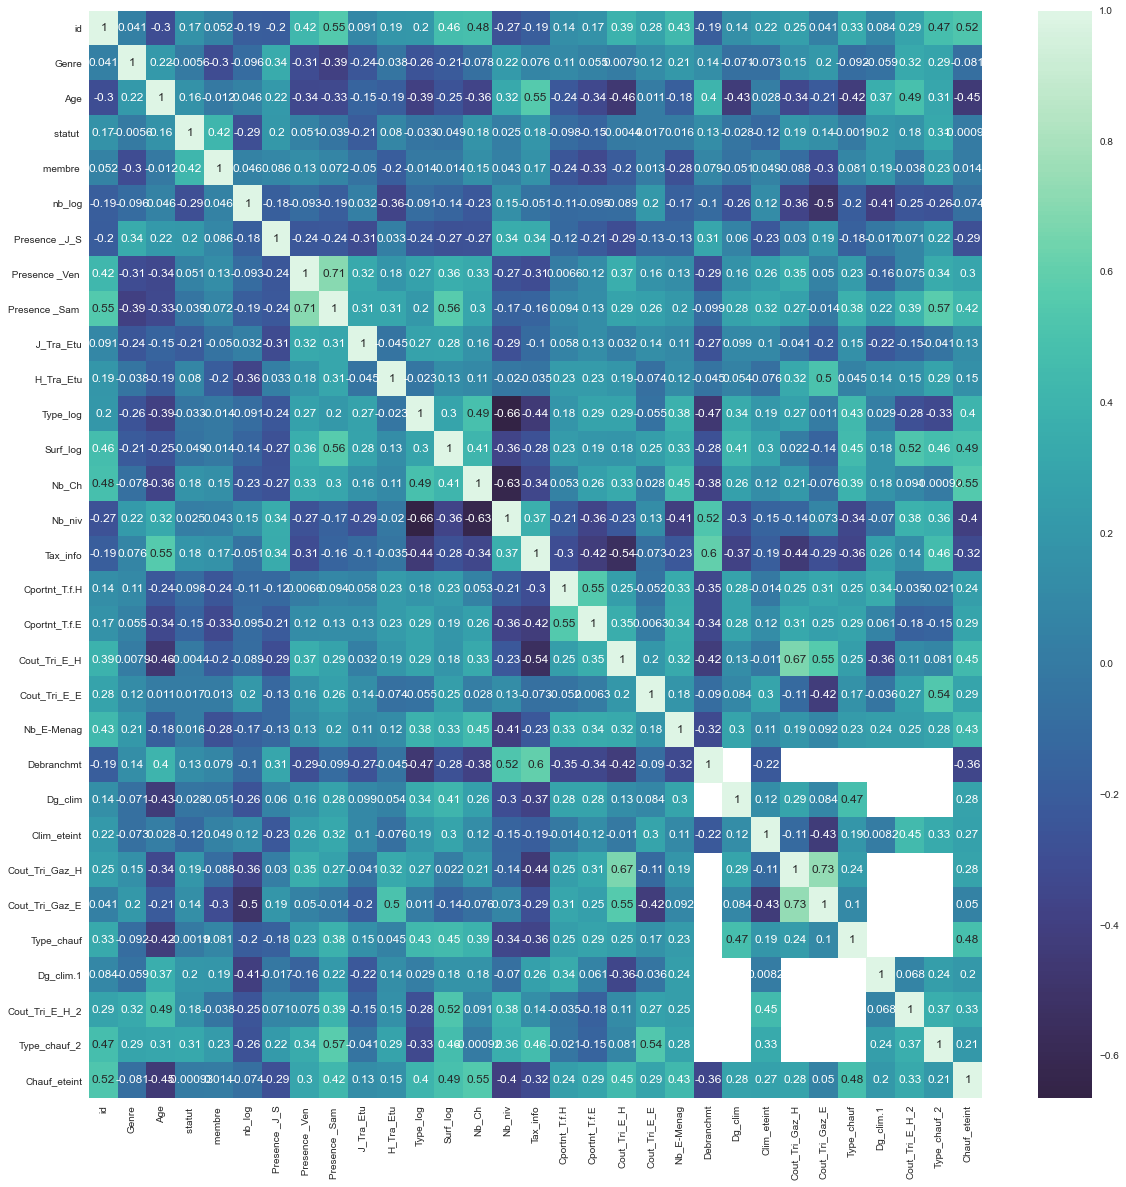

In [159]:
corrmat = Customer_data.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)